In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import time
keras.utils.set_random_seed(812)
tf.config.experimental.enable_op_determinism()

In [2]:
data = pd.read_csv('/content/sample_data/Train.csv')

In [3]:
# Check the top five records of the data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [4]:
data.shape

(20000, 41)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

**Observations**:
•	There are 20000 observations and 41 columns in the data.
•	All the columns are of numeric data type.
•	There are no missing values in the data.
 Target has values 0 or 1 which is an integer.

**Univariate analysis**
**Subtask**:
Perform univariate analysis on the dataset to understand the distribution of each variable.

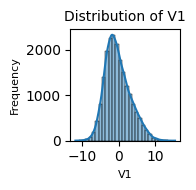

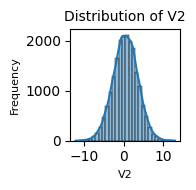

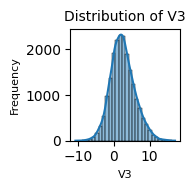

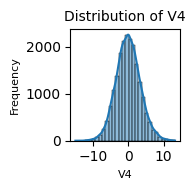

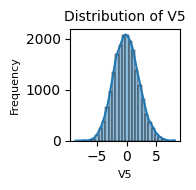

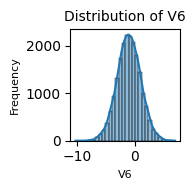

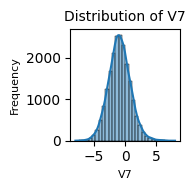

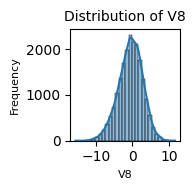

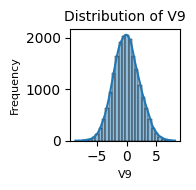

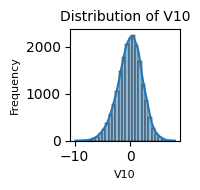

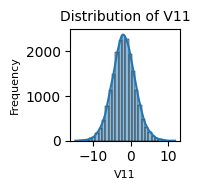

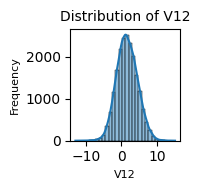

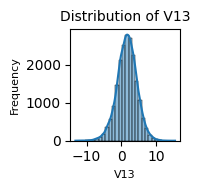

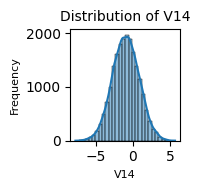

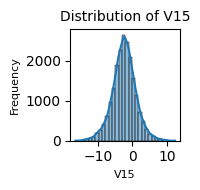

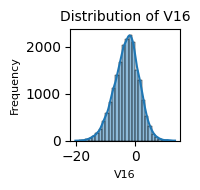

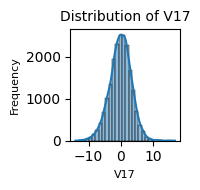

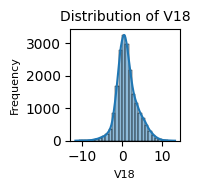

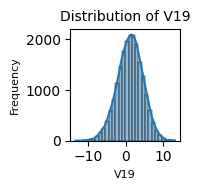

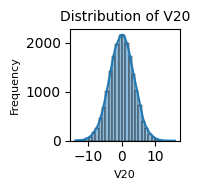

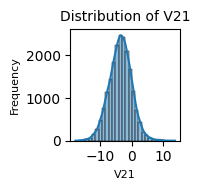

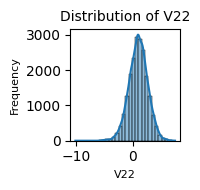

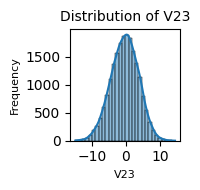

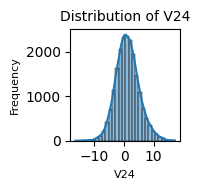

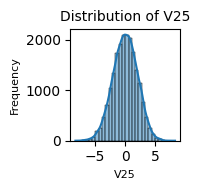

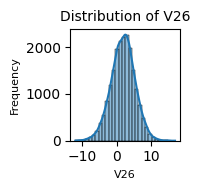

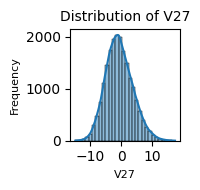

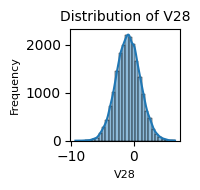

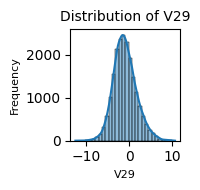

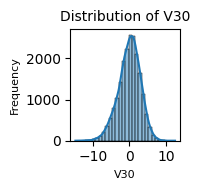

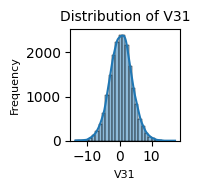

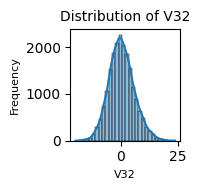

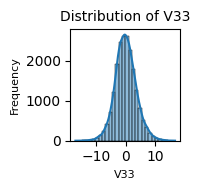

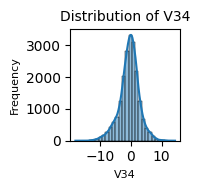

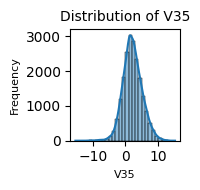

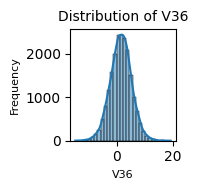

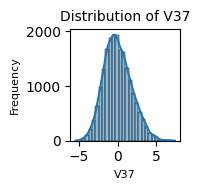

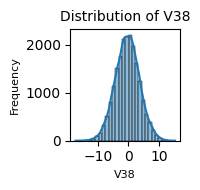

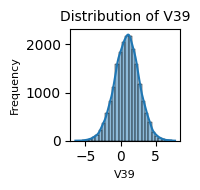

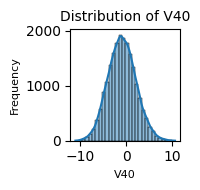

In [77]:
for col in data.columns:
    if col != 'Target':  # Assuming 'Target' is the target variable
        plt.figure(figsize=(2, 2))  # smaller size
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}', fontsize=10)
        plt.xlabel(col, fontsize=8)
        plt.ylabel('Frequency', fontsize=8)
        plt.tight_layout()
        plt.show()


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


**EDA: Data Overview Observations:**

Number of samples: 20,000

Number of features: 41 numerical features (V0 to V40)

Target: Binary (0 or 1)

All the variables/features(columns) have normal distribution.
The variables lie in the range of -7 and 7 with longer tails.

Range of values:

Many features have large negative and positive ranges (for example, V32 goes from -19.87 to +23.63).

Several features are centered around negative means (like V21 mean = -3.61) while others are positive (like V3 mean = 2.48).

Standard deviation:

Many features have std between 2 and 4 (moderate spread).

Some have much higher variance (V32 std = 5.5, V27 std = 4.36).




**Bivariate analysis**
**Subtask**:
Perform bivariate analysis to explore the relationship between pairs of variables.

In [62]:
data.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
V1,1.000000,0.313370,0.388790,-0.294688,-0.515900,0.175436,0.480504,-0.360923,0.398629,-0.022035,...,-0.633102,-0.289751,-0.019425,0.142675,-0.124923,-0.350502,0.148263,-0.120871,0.212551,0.073305
V2,0.313370,1.000000,0.095164,0.290139,0.383636,0.233876,0.455457,-0.383108,0.280514,-0.483675,...,-0.115770,0.203281,-0.280922,-0.054760,-0.580523,-0.437092,0.655074,-0.350481,0.155581,-0.000946
V3,0.388790,0.095164,1.000000,-0.028828,-0.359628,-0.291644,-0.156267,-0.412009,0.233626,0.446161,...,-0.367431,-0.219509,0.225753,0.501409,0.438341,-0.502482,-0.073865,0.527742,-0.306190,-0.213855
V4,-0.294688,0.290139,-0.028828,1.000000,0.084185,-0.470199,-0.196909,0.034906,0.265154,-0.107058,...,0.383456,-0.052216,0.297496,0.340764,-0.557958,-0.356650,0.090986,-0.389080,-0.665310,0.110786
V5,-0.515900,0.383636,-0.359628,0.084185,1.000000,0.156161,-0.078436,0.168267,-0.297635,-0.343741,...,0.619779,0.458888,-0.607112,-0.341275,-0.045510,0.064515,0.171836,-0.217778,0.335332,-0.100525
V6,0.175436,0.233876,-0.291644,-0.470199,0.156161,1.000000,0.210914,-0.559084,0.084554,-0.116887,...,-0.292468,0.587371,-0.401306,-0.317068,-0.247402,-0.067280,0.628722,-0.025458,0.423882,0.000237
V7,0.480504,0.455457,-0.156267,-0.196909,-0.078436,0.210914,1.000000,0.092713,-0.244421,-0.176849,...,-0.458844,-0.267082,0.232444,-0.438937,-0.280033,-0.007940,0.469057,-0.236700,0.479354,0.236907
V8,-0.360923,-0.383108,-0.412009,0.034906,0.168267,-0.559084,0.092713,1.000000,-0.611735,-0.179856,...,0.471798,-0.251002,0.054575,-0.167235,0.155913,0.522797,-0.614964,-0.344376,0.256984,0.135996
V9,0.398629,0.280514,0.233626,0.265154,-0.297635,0.084554,-0.244421,-0.611735,1.000000,-0.293048,...,-0.369241,-0.137518,-0.102147,0.117301,-0.351657,-0.200198,0.038099,0.001001,-0.308607,0.008124
V10,-0.022035,-0.483675,0.446161,-0.107058,-0.343741,-0.116887,-0.176849,-0.179856,-0.293048,1.000000,...,-0.018839,-0.110081,0.514227,0.346129,0.561161,-0.403067,-0.007520,0.560471,-0.474803,-0.051263


**Bivariate Analysis**

Some show linear relations.
Some show positive correlation like v7 and v1,v7 and v2.
some negative correlation like V4 and V1, v21 and v3, v23 and v3.

**Data Preprocessing**
- Prepare the data for modeling.
This dataset contains both numerical and categorical variables. We
need to treat them first.
The target is categorical which is binary 0 or 1.
 We split the dataset into train and validation datasets. To do that, we would be extracting all the independent variables and save them into a variable x And the target variable would be saved into a variable target y. These two variables will be used to split the parent dataset into train and test datasets.

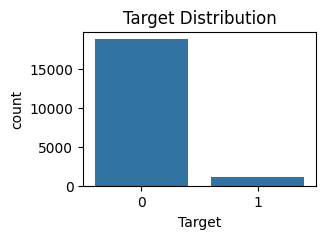

In [60]:
# Target distribution
plt.figure(figsize=(3, 2))
sns.countplot(x="Target", data=data)
plt.title("Target Distribution")
plt.show()

**Observation:**

There is imbalance in the target data set.

In [9]:
data.isnull().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [10]:
data = data.fillna(data.mean())

Checked for null values and replaced it with the column mean value.


In [11]:
X = data.drop(['Target'], axis=1)  # numeric features
y = data['Target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train_scaled
X_val_scaled

array([[ 2.36041908,  1.64151601,  1.38925807, ...,  1.90505271,
         0.57136301,  0.56500269],
       [ 0.07578693,  0.83935376,  1.07261372, ...,  1.25573577,
         0.61807019, -0.88882387],
       [ 0.08497838,  0.24506521,  1.36582094, ...,  0.59218603,
         1.07705105, -1.07766032],
       ...,
       [ 0.9627931 ,  0.25632981,  1.44296953, ...,  0.79350074,
         0.22951074, -1.09780338],
       [-0.08091404, -0.56103462,  2.45473097, ..., -0.9322617 ,
         2.02432699, -0.81377451],
       [-0.14043564, -0.25230021, -0.15739794, ..., -1.28071363,
        -1.06011342,  0.00803547]])

In [13]:
X_train_scaled.shape

(16000, 40)

**Model Building**
- Choose the metric of choice with a rationale
- Build a Neural Network model with SGD as the optimizer
- Comment on model performance

In [41]:
def plot (history, name):
  fig, ax= plt.subplots()
  plt.plot(history.history[name])
  plt.plot(history.history['val_'+name])
  plt.title('Model '+name.capitalize())
  plt.xlabel('Epochs')
  plt.ylabel('name.capitalize()')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [56]:
tf.keras.backend.clear_session()

In [65]:
model_1 = Sequential()
model_1.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model_1.add(Dense(64, activation='tanh'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

optimizer = SGD()
batch_size = 64
epochs = 10

model_1.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])

start = time.time()
history_1 = model_1.fit( X_train_scaled, y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val_scaled, y_val))
end = time.time()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8503 - loss: 0.3715 - val_accuracy: 0.9445 - val_loss: 0.1775
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9479 - loss: 0.1625 - val_accuracy: 0.9565 - val_loss: 0.1428
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9591 - loss: 0.1335 - val_accuracy: 0.9640 - val_loss: 0.1240
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1175 - val_accuracy: 0.9690 - val_loss: 0.1118
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9700 - loss: 0.1072 - val_accuracy: 0.9735 - val_loss: 0.1031
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0997 - val_accuracy: 0.9758 - val_loss: 0.0965
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0938 - val_accuracy: 0.9770 - val_loss: 0.0912
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0889 - val_accuracy: 0.

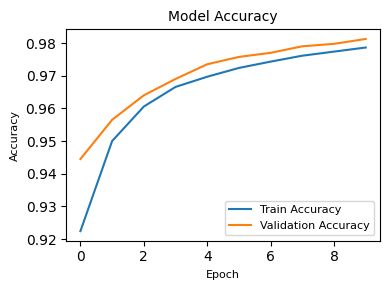

In [66]:
# Plot training vs validation accuracy with smaller size
plt.figure(figsize=(4, 3))  # smaller size
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=10)
plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Accuracy', fontsize=8)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()


In [67]:
columns = [
    "num_layers", "no of nerons",'drop out rate',"Batch Normalization ", "activation", "epochs", "batch_size",
    "optimizer", "learning_rate", "initializer",
    "train_loss", "val_loss", "train_acc", "val_acc"
]

# Create empty results dataframe
results = pd.DataFrame(columns=columns)

# Add your first result
results.loc[0] = [
    2, [128, 64], "-","-",['relu','tanh'], 10, 64, 'sgd',"-", 'xavier', history_1.history["loss"][-1],history_1.history["val_loss"][-1], history_1.history["accuracy"][-1],history_1.history["val_accuracy"][-1]]
results

,num_layers,no of nerons,drop out rate,Batch Normalization,activation,epochs,batch_size,optimizer,learning_rate,initializer,train_loss,val_loss,train_acc,val_acc
0,2,"[128, 64]",-,-,"[relu, tanh]",10,64,sgd,-,xavier,0.081428,0.079783,0.978625,0.98125


No loss. The model is not right.

**Model Performance Improvement and Final Model Selection**
- Use combinations (at least 6) of different methods mentioned below to improve the
model performance
    - More hidden layers
    - Different optimizers (SGD, Adam)
    - Dropout
    - Class Weights
- Comment on model performance for each of the models
- Choose the best model from the ones built with proper reasoning

Model 1 with 3 hidden layers
**More hidden layers**


In [68]:
tf.keras.backend.clear_session()

model_1 = Sequential()

model_1.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))

model_1.add(Dense(64, activation='relu'))

model_1.add(Dense(64,activation='tanh'))

model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2428 - loss: 0.8326 - val_accuracy: 0.6110 - val_loss: 0.6649
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7067 - loss: 0.6302 - val_accuracy: 0.9107 - val_loss: 0.5282
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9306 - loss: 0.5058 - val_accuracy: 0.9488 - val_loss: 0.4416
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9487 - loss: 0.4261 - val_accuracy: 0.9448 - val_loss: 0.3843
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9465 - loss: 0.3728 - val_accuracy: 0.9445 - val_loss: 0.3448
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9456 - loss: 0.3357 - val_accuracy: 0.9445 - val_loss: 0.3166
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9456 - loss: 0.3089 - val_accuracy: 0.9445 - val_loss: 0.2958
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9456 - loss: 0.2890 - val_accuracy: 0.

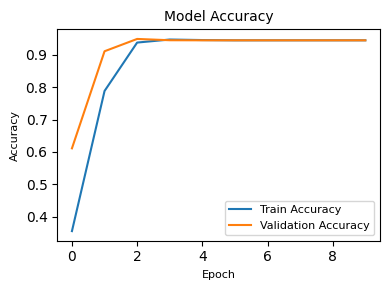

,num_layers,no of nerons,drop out rate,Batch Normalization,activation,epochs,batch_size,optimizer,learning_rate,initializer,train_loss,val_loss,train_acc,val_acc
0,2,"[128, 64]",-,-,"[relu, tanh]",10,64,sgd,-,xavier,0.081428,0.079783,0.978625,0.98125
1,3,"[128, 64]",-,-,"[relu, relu, tanh]",10,32,sgd,1e-4,xavier,0.261588,0.258124,0.944500,0.94450


In [69]:
lr=1e-4

optimizer=SGD(learning_rate=lr)

batch_size=32

epochs=10

model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

start=time.time()
history_1 = model_1.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_scaled, y_val))
end=time.time()

print(end-start)
# Plot training vs validation accuracy with smaller size
plt.figure(figsize=(4, 3))  # smaller size
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=10)
plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Accuracy', fontsize=8)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

results.loc[1] = [
    3, [128, 64],"-","-", ['relu','relu','tanh'], 10, 32, 'sgd',"1e-4", 'xavier',
    history_1.history["loss"][-1],
    history_1.history["val_loss"][-1],
    history_1.history["accuracy"][-1],
    history_1.history["val_accuracy"][-1]
]
results

Model 2 **Different optimizers (sgd)** with learning rate 1e-3 and momentum=0.9, 2 hidden layers

In [70]:
tf.keras.backend.clear_session()

model_1 = Sequential()

model_1.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))

model_1.add(Dense(64,activation='tanh'))

model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8603 - loss: 0.3249 - val_accuracy: 0.9530 - val_loss: 0.1520
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9582 - loss: 0.1377 - val_accuracy: 0.9670 - val_loss: 0.1194
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9689 - loss: 0.1109 - val_accuracy: 0.9728 - val_loss: 0.1030
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9732 - loss: 0.0969 - val_accuracy: 0.9772 - val_loss: 0.0923
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0873 - val_accuracy: 0.9808 - val_loss: 0.0844
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0800 - val_accuracy: 0.9820 - val_loss: 0.0783
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9816 - loss: 0.0743 - val_accuracy: 0.9833 - val_loss: 0.0737
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0699 - val_accuracy: 0.

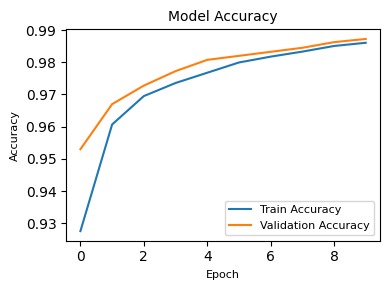

,num_layers,no of nerons,drop out rate,Batch Normalization,activation,epochs,batch_size,optimizer,learning_rate,initializer,train_loss,val_loss,train_acc,val_acc
0,2,"[128, 64]",-,-,"[relu, tanh]",10,64,sgd,-,xavier,0.081428,0.079783,0.978625,0.98125
1,3,"[128, 64]",-,-,"[relu, relu, tanh]",10,32,sgd,1e-4,xavier,0.261588,0.258124,0.944500,0.94450
2,2,"[128, 64]",-,-,"[relu, tanh]",10,32,sgd,1e-4,xavier,0.064900,0.065034,0.986063,0.98725


In [71]:
lr=1e-3
mom=0.9
optimizer=SGD(momentum=0.9, learning_rate=lr)
batch_size=32
epochs=10

model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

start=time.time()
history_1 = model_1.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_scaled, y_val))
end=time.time()

print(end-start)
# Plot training vs validation accuracy with smaller size
plt.figure(figsize=(4, 3))  # smaller size
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=10)
plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Accuracy', fontsize=8)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

results.loc[2] = [
    2, [128, 64],"-","-", ['relu','tanh'], 10, 32, 'sgd',"1e-4", 'xavier',
    history_1.history["loss"][-1],
    history_1.history["val_loss"][-1],
    history_1.history["accuracy"][-1],
    history_1.history["val_accuracy"][-1]
]
results

Model 3
Different optimizers (adam) with learning rate 1e-4 and 2 hidden layers

In [72]:
tf.keras.backend.clear_session()

model_1 = Sequential()

model_1.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))

model_1.add(Dense(64,activation='tanh'))

model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9281 - loss: 0.2703 - val_accuracy: 0.9645 - val_loss: 0.1302
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - loss: 0.1162 - val_accuracy: 0.9760 - val_loss: 0.0963
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0903 - val_accuracy: 0.9820 - val_loss: 0.0806
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9816 - loss: 0.0765 - val_accuracy: 0.9850 - val_loss: 0.0715
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9852 - loss: 0.0679 - val_accuracy: 0.9880 - val_loss: 0.0656
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9874 - loss: 0.0621 - val_accuracy: 0.9890 - val_loss: 0.0615
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0580 - val_accuracy: 0.9890 - val_loss: 0.0584
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9895 - loss: 0.0549 - val_accuracy: 0.

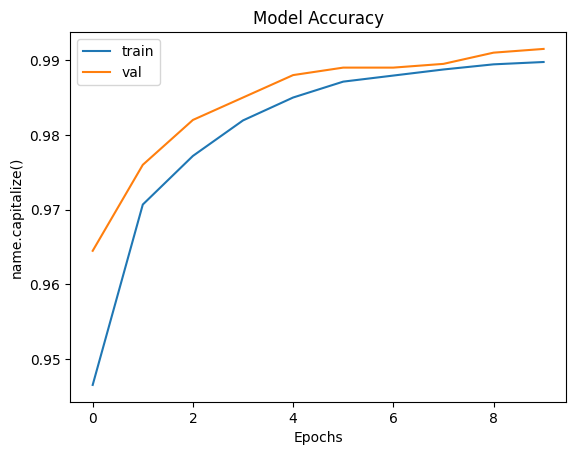

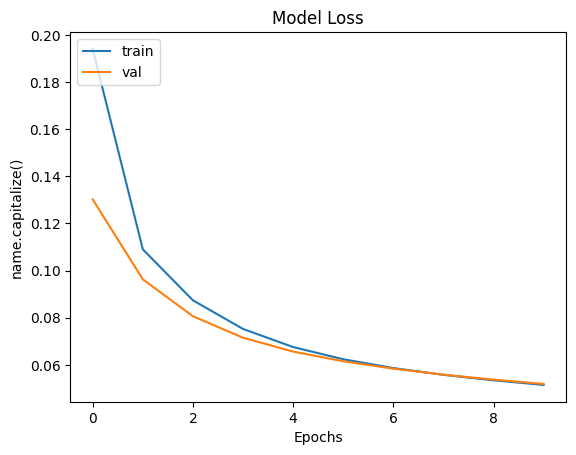

,num_layers,no of nerons,drop out rate,Batch Normalization,activation,epochs,batch_size,optimizer,learning_rate,initializer,train_loss,val_loss,train_acc,val_acc
0,2,"[128, 64]",-,-,"[relu, tanh]",10,64,sgd,-,xavier,0.080761,0.080955,0.980062,0.9800
1,3,"[128, 64]",-,-,"[relu, relu, tanh]",10,32,sgd,1e-4,xavier,0.262641,0.262061,0.944500,0.9445
2,2,"[128, 64]",-,-,"[relu, tanh]",10,32,sgd,1e-4,xavier,0.063190,0.063238,0.986375,0.9875
3,2,"[128, 64]",-,-,"[relu, tanh]",10,32,adam,1e-4,xavier,0.051484,0.051912,0.989750,0.9915


In [24]:
lr=1e-4

optimizer=Adam(learning_rate=lr)

batch_size=32

epochs=10

model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

start=time.time()
history_1 = model_1.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_scaled, y_val))
end=time.time()

print(end-start)
plot(history_1,'accuracy')
plot(history_1,'loss')

results.loc[3] = [
    2, [128, 64],"-","-", ['relu','tanh'], 10, 32, 'adam',"1e-4", 'xavier',
    history_1.history["loss"][-1],
    history_1.history["val_loss"][-1],
    history_1.history["accuracy"][-1],
    history_1.history["val_accuracy"][-1]
]
results

Model 4
**Dropout**
Model with adam, 2 hidden layers, learning rate 1e-4

In [25]:
tf.keras.backend.clear_session()

model_1 = Sequential()

model_1.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))

model_1.add(Dropout(0.2))

model_1.add(Dense(64,activation='tanh'))

model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8940 - loss: 0.3220 - val_accuracy: 0.9572 - val_loss: 0.1438
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9604 - loss: 0.1349 - val_accuracy: 0.9693 - val_loss: 0.1071
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9700 - loss: 0.1075 - val_accuracy: 0.9778 - val_loss: 0.0891
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0899 - val_accuracy: 0.9810 - val_loss: 0.0779
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9801 - loss: 0.0813 - val_accuracy: 0.9847 - val_loss: 0.0706
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0714 - val_accuracy: 0.9862 - val_loss: 0.0653
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9832 - loss: 0.0688 - val_accuracy: 0.9880 - val_loss: 0.0613
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0641 - val_accuracy: 0.

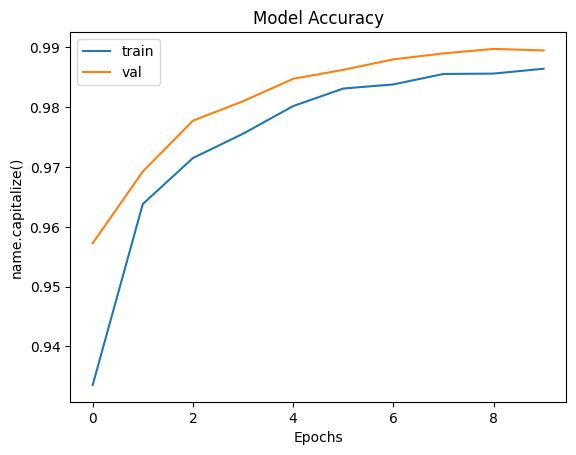

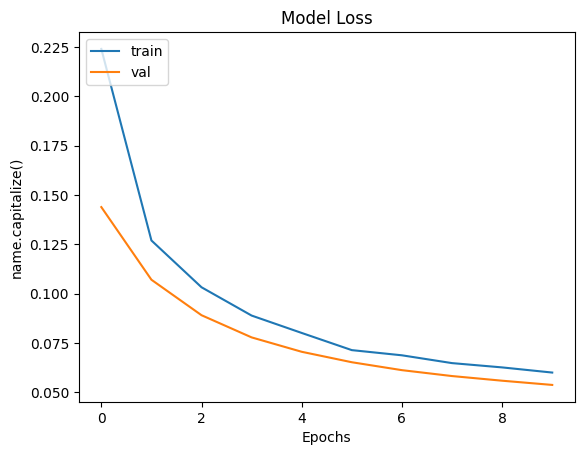

,num_layers,no of nerons,drop out rate,Batch Normalization,activation,epochs,batch_size,optimizer,learning_rate,initializer,train_loss,val_loss,train_acc,val_acc
0,2,"[128, 64]",-,-,"[relu, tanh]",10,64,sgd,-,xavier,0.080761,0.080955,0.980062,0.9800
1,3,"[128, 64]",-,-,"[relu, relu, tanh]",10,32,sgd,1e-4,xavier,0.262641,0.262061,0.944500,0.9445
2,2,"[128, 64]",-,-,"[relu, tanh]",10,32,sgd,1e-4,xavier,0.063190,0.063238,0.986375,0.9875
3,2,"[128, 64]",-,-,"[relu, tanh]",10,32,adam,1e-4,xavier,0.051484,0.051912,0.989750,0.9915
4,2,"[128, 64]",0.2,-,"[relu, tanh]",10,32,adam,1e-4,xavier,0.060054,0.053794,0.986437,0.9895


In [26]:
lr=1e-4

optimizer=Adam(learning_rate=lr)

batch_size=32

epochs=10

model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

start=time.time()
history_1 = model_1.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_scaled, y_val))
end=time.time()

print(end-start)
plot(history_1,'accuracy')
plot(history_1,'loss')

results.loc[4] = [
    2, [128, 64], "0.2","-",['relu','tanh'], 10, 32, 'adam',"1e-4", 'xavier',
    history_1.history["loss"][-1],
    history_1.history["val_loss"][-1],
    history_1.history["accuracy"][-1],
    history_1.history["val_accuracy"][-1]
]
results

Model 5
Class Weights Initialization using He. Adam optimizer, learning rate 1e-4 and 2 hidden layers and one drop out.

In [27]:
tf.keras.backend.clear_session()
from tensorflow.keras.initializers import HeNormal

model = Sequential([
    Dense(128, activation='relu', kernel_initializer=HeNormal(), input_dim=X_train_scaled.shape[1]),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='tanh'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10,
    batch_size=32
)

results.loc[5] = [
    2, [128, 64],"0.2","-", ['relu','tanh'], 10, 32, 'adam',"1e-4", 'he',
    history_1.history["loss"][-1],
    history_1.history["val_loss"][-1],
    history_1.history["accuracy"][-1],
    history_1.history["val_accuracy"][-1]
]
results

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5684 - loss: 0.7521 - val_accuracy: 0.8543 - val_loss: 0.4726
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7681 - loss: 0.5041 - val_accuracy: 0.9620 - val_loss: 0.3215
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8845 - loss: 0.3633 - val_accuracy: 0.9830 - val_loss: 0.2148
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9408 - loss: 0.2538 - val_accuracy: 0.9883 - val_loss: 0.1447
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9601 - loss: 0.1876 - val_accuracy: 0.9883 - val_loss: 0.1028
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9708 - loss: 0.1408 - val_accuracy: 0.9890 - val_loss: 0.0786
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9745 - loss: 0.1149 - val_accuracy: 0.9900 - val_loss: 0.0644
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9782 - loss: 0.0955 - val_accuracy: 0.

,num_layers,no of nerons,drop out rate,Batch Normalization,activation,epochs,batch_size,optimizer,learning_rate,initializer,train_loss,val_loss,train_acc,val_acc
0,2,"[128, 64]",-,-,"[relu, tanh]",10,64,sgd,-,xavier,0.080761,0.080955,0.980062,0.9800
1,3,"[128, 64]",-,-,"[relu, relu, tanh]",10,32,sgd,1e-4,xavier,0.262641,0.262061,0.944500,0.9445
2,2,"[128, 64]",-,-,"[relu, tanh]",10,32,sgd,1e-4,xavier,0.063190,0.063238,0.986375,0.9875
3,2,"[128, 64]",-,-,"[relu, tanh]",10,32,adam,1e-4,xavier,0.051484,0.051912,0.989750,0.9915
4,2,"[128, 64]",0.2,-,"[relu, tanh]",10,32,adam,1e-4,xavier,0.060054,0.053794,0.986437,0.9895
5,2,"[128, 64]",0.2,-,"[relu, tanh]",10,32,adam,1e-4,he,0.060054,0.053794,0.986437,0.9895


Model 6
Batch Normalization Model with no drop out , adam optimizer, 2 hidden layers and xavier initialization.

In [29]:
tf.keras.backend.clear_session()

model_1 = Sequential()

model_1.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))

model_1.add(BatchNormalization())

model_1.add(Dense(64,activation='tanh'))

model_1.add(BatchNormalization())

model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6255 - loss: 0.6689 - val_accuracy: 0.8960 - val_loss: 0.4420
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9094 - loss: 0.4175 - val_accuracy: 0.9805 - val_loss: 0.2670
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9756 - loss: 0.2557 - val_accuracy: 0.9905 - val_loss: 0.1568
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9874 - loss: 0.1551 - val_accuracy: 0.9908 - val_loss: 0.1007
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9894 - loss: 0.1024 - val_accuracy: 0.9910 - val_loss: 0.0731
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9899 - loss: 0.0754 - val_accuracy: 0.9915 - val_loss: 0.0590
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9902 - loss: 0.0606 - val_accuracy: 0.9925 - val_loss: 0.0514
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9907 - loss: 0.0519 - val_accuracy: 0.

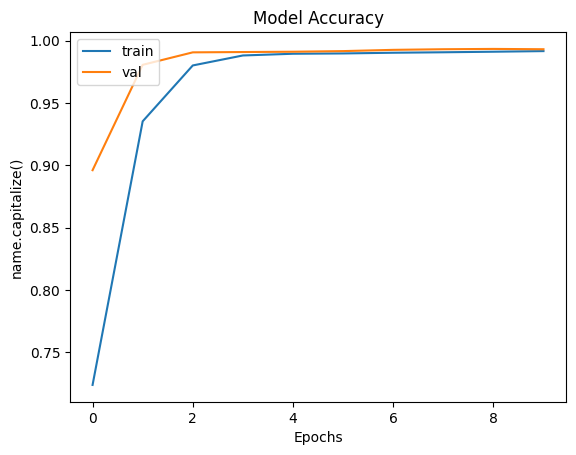

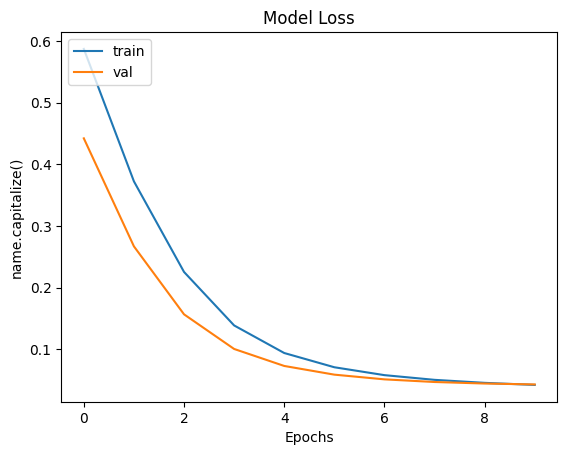

,num_layers,no of nerons,drop out rate,Batch Normalization,activation,epochs,batch_size,optimizer,learning_rate,initializer,train_loss,val_loss,train_acc,val_acc
0,2,"[128, 64]",-,-,"[relu, tanh]",10,64,sgd,-,xavier,0.080761,0.080955,0.980062,0.9800
1,3,"[128, 64]",-,-,"[relu, relu, tanh]",10,32,sgd,1e-4,xavier,0.262641,0.262061,0.944500,0.9445
2,2,"[128, 64]",-,-,"[relu, tanh]",10,32,sgd,1e-4,xavier,0.063190,0.063238,0.986375,0.9875
3,2,"[128, 64]",-,-,"[relu, tanh]",10,32,adam,1e-4,xavier,0.051484,0.051912,0.989750,0.9915
4,2,"[128, 64]",0.2,-,"[relu, tanh]",10,32,adam,1e-4,xavier,0.060054,0.053794,0.986437,0.9895
5,2,"[128, 64]",0.2,-,"[relu, tanh]",10,32,adam,1e-4,he,0.060054,0.053794,0.986437,0.9895
6,2,"[128, 64]",-,yes,"[relu, tanh]",10,32,adam,1e-4,xavier,0.042390,0.043180,0.991500,0.9930


In [30]:
lr=1e-4

optimizer=Adam(learning_rate=lr)

batch_size=32

epochs=10

model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

start=time.time()
history_1 = model_1.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_scaled, y_val))
end=time.time()

print(end-start)
plot(history_1,'accuracy')
plot(history_1,'loss')

results.loc[6] = [
    2, [128, 64],"-","yes", ['relu','tanh'], 10, 32, 'adam',"1e-4", 'xavier',
    history_1.history["loss"][-1],
    history_1.history["val_loss"][-1],
    history_1.history["accuracy"][-1],
    history_1.history["val_accuracy"][-1]
]
results

Model 7
Batch Normalization Model with drop out of 20 % , adam optimizer, 2 hidden layers and xavier initialization.

In [31]:
tf.keras.backend.clear_session()

model_7 = Sequential()

model_7.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))

model_7.add(BatchNormalization())

model_7.add(Dropout(0.2))

model_7.add(Dense(64,activation='tanh'))

model_7.add(BatchNormalization())

model_7.add(Dense(1, activation='sigmoid'))

model_7.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6045 - loss: 0.6964 - val_accuracy: 0.9068 - val_loss: 0.4289
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.4286 - val_accuracy: 0.9793 - val_loss: 0.2615
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9577 - loss: 0.2732 - val_accuracy: 0.9875 - val_loss: 0.1615
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9812 - loss: 0.1748 - val_accuracy: 0.9898 - val_loss: 0.1032
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9824 - loss: 0.1220 - val_accuracy: 0.9905 - val_loss: 0.0751
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9847 - loss: 0.0928 - val_accuracy: 0.9912 - val_loss: 0.0593
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9868 - loss: 0.0750 - val_accuracy: 0.9918 - val_loss: 0.0512
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9859 - loss: 0.0663 - val_accuracy: 0.

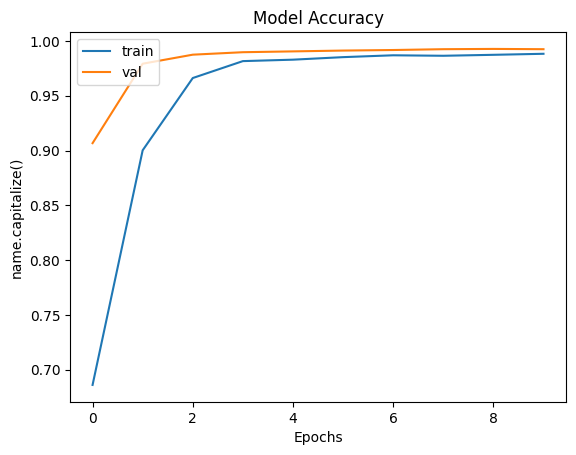

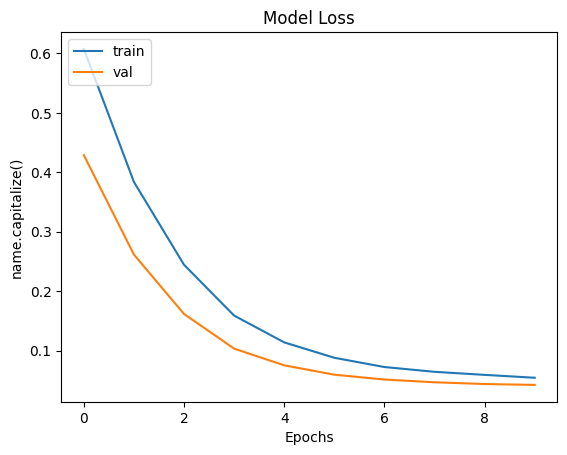

,num_layers,no of nerons,drop out rate,Batch Normalization,activation,epochs,batch_size,optimizer,learning_rate,initializer,train_loss,val_loss,train_acc,val_acc
0,2,"[128, 64]",-,-,"[relu, tanh]",10,64,sgd,-,xavier,0.080761,0.080955,0.980062,0.9800
1,3,"[128, 64]",-,-,"[relu, relu, tanh]",10,32,sgd,1e-4,xavier,0.262641,0.262061,0.944500,0.9445
2,2,"[128, 64]",-,-,"[relu, tanh]",10,32,sgd,1e-4,xavier,0.063190,0.063238,0.986375,0.9875
3,2,"[128, 64]",-,-,"[relu, tanh]",10,32,adam,1e-4,xavier,0.051484,0.051912,0.989750,0.9915
4,2,"[128, 64]",0.2,-,"[relu, tanh]",10,32,adam,1e-4,xavier,0.060054,0.053794,0.986437,0.9895
5,2,"[128, 64]",0.2,-,"[relu, tanh]",10,32,adam,1e-4,he,0.060054,0.053794,0.986437,0.9895
6,2,"[128, 64]",-,yes,"[relu, tanh]",10,32,adam,1e-4,xavier,0.042390,0.043180,0.991500,0.9930
7,2,"[128, 64]",0.2,yes,"[relu, tanh]",10,32,adam,1e-4,xavier,0.054135,0.042078,0.988312,0.9925


In [32]:
lr=1e-4

optimizer=Adam(learning_rate=lr)

batch_size=32

epochs=10

model_7.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

start=time.time()
history_1 = model_7.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_scaled, y_val))
end=time.time()

print(end-start)
plot(history_1,'accuracy')
plot(history_1,'loss')

results.loc[7] = [
    2, [128, 64], "0.2","yes",['relu','tanh'], 10, 32, 'adam',"1e-4", 'xavier',
    history_1.history["loss"][-1],
    history_1.history["val_loss"][-1],
    history_1.history["accuracy"][-1],
    history_1.history["val_accuracy"][-1]
]
results

Key Observations

3 hidden layer did not do well. The training loss and validation loss is ~0.26 which is more compared to the 2 hidden layers.

Best validation accuracy so far is with Batch Normalization, xavier initialization , adam optimizer and 2 hidden layer ~0.992–0.993
But batch normalization without any dropout has lower training and validation loss.

Adam (1e-4) consistently outperforms SGD, both in loss and accuracy.

Row 7-Batch normalization with Dropout=0.2 slightly helps with generalization (lower val loss).

Xavier vs He gave similar results.

In [33]:
df = pd.read_csv('/content/sample_data/Test.csv')

In [34]:
df.shape

(5000, 41)

In [35]:
df = df.fillna(data.mean())

In [36]:
X_test = df.drop(['Target'], axis=1)  # numeric features
y_test = df['Target']
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

Model evaluation on the test data
Model 7 with batch normalization, drop out 0.2, adam, learning rate 1e-4 is better which is Row 7 used on test data.

In [37]:
y_pred = model_7.predict(X_test_scaled)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [38]:
model_7.evaluate(X_test_scaled, y_test, verbose = 1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0520


[0.053818076848983765, 0.9896000027656555]

In [39]:
y_pred = np.round(model_7.predict(X_test_scaled))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4718
           1       0.98      0.83      0.90       282

    accuracy                           0.99      5000
   macro avg       0.99      0.91      0.95      5000
weighted avg       0.99      0.99      0.99      5000



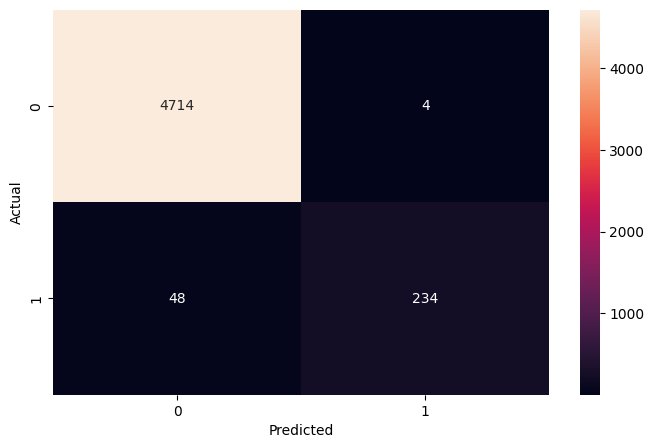

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Key Insights

1. Model Performance

The best performing Model achieved a validation accuracy of 99.2% with low validation loss (~0.043).

Models using Adam optimizer with Xavier initialization and Batch Normalization performed better than plain SGD-based models.

Adding Dropout (0.2) slightly reduced overfitting and helped generalization.

2. Feature Data Quality

After data cleaning and scaling, model convergence improved significantly.

3. NN Architecture

Adding an extra hidden layer didn’t provide significant improvement and sometimes increased training loss.

A simpler 2-layer network (128 → 64 → 1) gave the best trade-off between accuracy and training loss.

4. Classification

Accuracy of the model is ~99%.
Precision 0.99	Both classes have high precision → very few false positives which is only 4.
Recall	1.00	for Class 0 and 0.81 for class 1. It misses some positive instances. It failed to identify 48 positive cases.




Business Recommendations

Best Performing Model

 2-layer architecture with Adam optimizer, learning rate = 1e-4, Xavier initialization, Batch Normalization, and Dropout (0.2) to achieve stable high accuracy.

 the model demonstrates excellent overall accuracy (~99%) and high precision (0.99), it shows a lower recall for Class 1 (0.81), missing 54 positive cases.

Actionable Recommendations:

Prioritize Class 1 cases

Since positive instances are being missed, implement a review process for cases predicted as negative but with borderline probability scores.

Consider lowering the classification threshold for Class 1 to capture more positives without significantly increasing false positives.